In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

In [2]:
#torchvision is used for vision or computer vision

In [3]:
#you have to seperate training and testing 
train = datasets.MNIST("", train = True, download = True, 
                       transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train = False, download = True, 
                      transform = transforms.Compose([transforms.ToTensor()]))

In [4]:
#batch size is how many we want to pass to our dataset, we have to batch for memory
#and we use batching because we hope that it will generalize
#passing it all at once will allow for more optimization

#load the training data
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)

#load the testing data
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

In [5]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [6]:
#first we can reference the variable from the for loop
#the data is worked out like this data[0] = the arrays, data[1] = the tensor output
#then we need to reference the first of the array and of the tensor output
#that would be data[0][0] and data[1][0]

x, y = data[0][0], data[1][0]

print(y)

tensor(6)


In [7]:
import matplotlib.pyplot as plt

In [8]:
#when we look at the shape
data[0][0].shape

#the shape is 1,28,28 which isn't a visual, its probably a tensor

torch.Size([1, 28, 28])

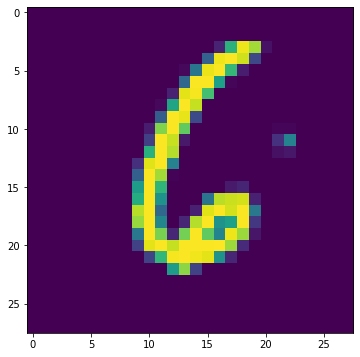

In [9]:
plt.figure(figsize = (6,6))
plt.imshow(data[0][0].view(28,28))

In [10]:
#if we had like 90% 3s the ML will learn to decrease loss by just guessing 3
#that is because the loss function is determined on the output
total  = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1
        
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [11]:
for i in counter_dict:
    print("{}:".format(i),  round(counter_dict[i] / total * 100, 2), "%")

0: 9.87 %
1: 11.24 %
2: 9.93 %
3: 10.22 %
4: 9.74 %
5: 9.04 %
6: 9.86 %
7: 10.44 %
8: 9.75 %
9: 9.92 %


In [12]:
import torch.nn as nn
import torch.nn.functional as F

In [13]:
class Net(nn.Module):
    
    #we want to initialize the module
    def __init__(self):
        
        #this is to pass through the features and paramaters of nn.Module
        super().__init__()
        
        #def fully conected layers
        
        #fc fully connected layers, 784 is 28 x 28, that is the flattened image
        #we want 3 layers of 64 layes
        
        #input layer
        self.fc1 = nn.Linear(28 * 28, 64)
        
        #these are more of our hidden layers they need to match output layer 
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        
        #output layer
        self.fc4 = nn.Linear(64, 10)
        
    #how the data will flow through our network
    def forward(self, x):
        
        #passing through al of the layers, and they need the activation function
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        
        #pass the data through without activation because its the output
        x = self.fc4(x)
        
        #we use our loss function in the return statement, the dimension is the number of axis
        #the dim says which number we want to pass to 1, dim1 is the output layer of tensors
        return F.log_softmax(x, dim = 1)

In [14]:
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [15]:
X = torch.rand((28,28))
X = X.view(-1,28*28)

In [16]:
output = net(X)
output

tensor([[-2.3626, -2.3818, -2.2147, -2.3641, -2.2679, -2.3574, -2.3485, -2.2513,
         -2.2482, -2.2474]], grad_fn=<LogSoftmaxBackward>)

We need loss and optimizers

In [17]:
import torch.optim as optim

#net.parameters is everything that is adjustable
optimizer = optim.Adam(net.parameters(), lr = 0.001)
EPOCHS = 3

#when you have a big learning rate you never make steps big enough to test for a new optimization level
#same with little steps they aren't big enough to try a new minima
#we need the right size
#we also can use decaying rate which starts with big jumps and then gets little jumps

In [19]:
for epoch in range(EPOCHS):
    
    #data is a batch of feaures sets and labels
    for data in trainset:
        
        #unpack the data, may be a tuple or a list
        X, y = data
        
        #batching data decreases dataset
        #batches help generalize 
        net.zero_grad()
        
        #this is the output
        output = net(X.view(-1, 28 * 28))
        
        #calculate loss metrics
        loss = F.nll_loss(output, y)
        
        #if your data is a vector use mean squared loss (for one hot vector)
        
        #now we want to backpropogate
        loss.backward()
        
        #adjust the weights for us
        optimizer.step()
    
    print(loss)

tensor(0.1866, grad_fn=<NllLossBackward>)
tensor(0.0003, grad_fn=<NllLossBackward>)
tensor(0.2888, grad_fn=<NllLossBackward>)


In [20]:
#keep track of how good things are
correct = 0
total = 0

#these are out of sample data points we don't want to optimize it
with torch.no_grad():
    
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 784))
        
        #we want to compare the is the argmax (scalar value output)
        for idx, i in enumerate(output):
            
            #if we have the right prediction
            if torch.argmax(i) == y[idx]:
                
                #log that correct prediction
                corect += 1
        
        #we want to always keep track of how many tests we have
        total += 1

NameError: name 'corect' is not defined